In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT',
    'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD',
    'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NVCR', 'NVDA', 'ODFL', 'OKTA', 'OPEN',
    'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL', 'RBLX',
    'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM', 'SBUX',
    'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TSCO',
    'TSLA', 'TTD', 'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV',
    'VLD', 'VRTX', 'XPEV', 'ZEN', 'ZM']
LINGERERS = [
    'ABST', 'AGI', 'AMEH', 'AMRK', 'APT', 'BTTR', 'BYRN', 'CEF',
    'CENN', 'CGAU', 'CIZN', 'CTGO', 'DQ', 'DTST', 'DYAI','EP',
    'FCUV', 'FKWL', 'FNV', 'FSI', 'GCBC', 'GME', 'HMY', 'HNRG',
    'IDR', 'IEI', 'INTZ', 'KREF', 'MCVT', 'MICS', 'MIY', 'MNMD',
    'MOBQ', 'MTA', 'NAN', 'OMQS', 'PETV', 'POWW', 'PRPH', 'RVP',
    'RVYL', 'SOBR', 'VIRT', 'WAVD', 'WKHS', 'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'AMRC', 'BRTX', 'CHEF', 'COOP', 'CSIQ', 'CTSH', 'CVE',
    'ELC', 'ENPH', 'GGE', 'GLDG', 'HBM', 'LFMD', 'NTAP', 'PACB',
    'PAYS', 'RFP', 'TITN']

INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-12-03', datetime.date(2022, 12, 3))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  153 of 153 completed
Generating derived columns...
AAPL... ABMD... ABNB... ABST... ACN... ADBE... ADYEY... AGI... AMD... AMEH... AMGN... AMRC... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BRTX... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHEF... CHWY... CIZN... COOP... CRWD... CSIQ... CTGO... CTSH... CVE... DDOG... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EDIT... ELC... ENPH... EP... ETSY... FCUV... FKWL... FLGT... FNV... FSI... FTNT... GCBC... GGE... GH... GLDG... GME... GMED... GOOG... HBM... HMY... HNRG... IDR... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MIY... MNMD... MNST... MOBQ... MSFT... MTA... MTCH... NAN... NET... NTAP... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PAYS... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RFP... RGEN... RIVN... RMD... RO

In [5]:
data['Date'].tail()

2514   2022-11-28
2515   2022-11-29
2516   2022-11-30
2517   2022-12-01
2518   2022-12-02
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.998290
2       1.001585
3       1.003307
4       1.002921
5       1.000339
          ...   
2514    0.984556
2515    0.998408
2516    1.030948
2517    0.999132
2518    0.998805
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.004069
2,1.006813
3,1.005798
4,1.007933
5,1.010447
...,...
2514,0.995776
2515,1.006112
2516,1.058876
2517,1.023672


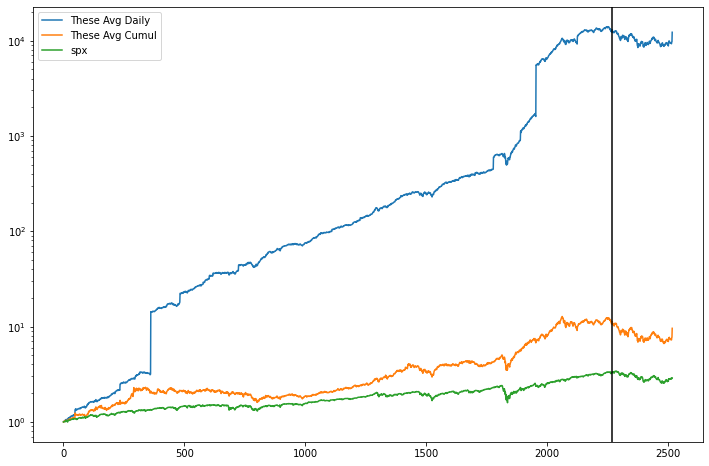

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-12-03,NaN,NaN
1,2012-12-04,0.998563,0.998563
2,2012-12-05,1.009090,1.008699
3,2012-12-06,1.005375,1.003354
4,2012-12-07,1.005694,1.003680


In [10]:
out.tail()

,Date,mine1,mine2
2514,2022-11-28,9337.658157,7.304033
2515,2022-11-29,9273.148573,7.225511
2516,2022-11-30,9664.995318,7.611634
2517,2022-12-01,9754.019839,7.723154
2518,2022-12-02,12239.998247,9.577449


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

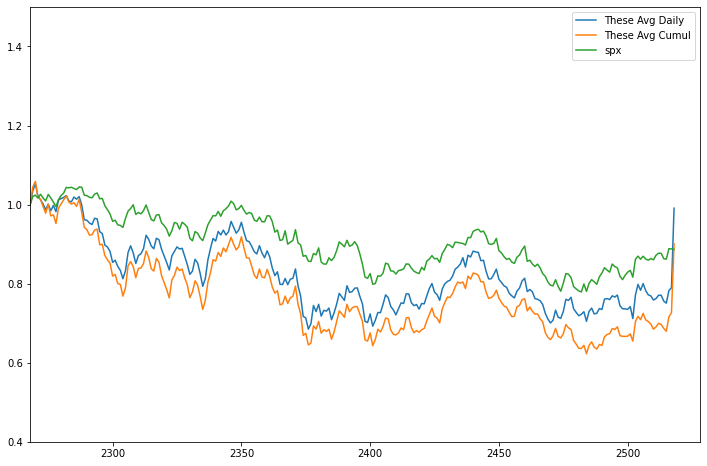

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2459,63.470001,63.470001,64.209999,61.259998,61.740002,4.150567,1.028021,1.069239,1.040094
2460,66.430000,66.430000,66.464996,63.730000,64.000000,4.196149,1.037969,1.046636,1.008350
2461,63.049999,63.049999,64.160004,62.000000,62.750000,4.143928,1.004781,0.949119,0.944603
2462,62.880001,62.880001,62.919998,60.709999,61.750000,4.141228,1.018300,0.997304,0.979381
2463,60.770000,60.770000,63.000000,60.180000,61.650002,4.107096,0.985726,0.966444,0.980439


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2459,63.470001,63.470001,64.209999,61.259998
2460,66.430000,66.430000,66.464996,63.730000
2461,63.049999,63.049999,64.160004,62.000000
2462,62.880001,62.880001,62.919998,60.709999
2463,60.770000,60.770000,63.000000,60.180000


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2459,63.470001,63.470001,64.209999,61.259998,66.464996,63.730000,1.047188,1.004096
2460,66.430000,66.430000,66.464996,63.730000,64.160004,62.000000,0.965829,0.933313
2461,63.049999,63.049999,64.160004,62.000000,62.919998,60.709999,0.997938,0.962887
2462,62.880001,62.880001,62.919998,60.709999,63.000000,60.180000,1.001908,0.957061
2463,60.770000,60.770000,63.000000,60.180000,59.080002,57.720001,0.972190,0.949811


0.05    0.972145
Name: HighMult, dtype: float64


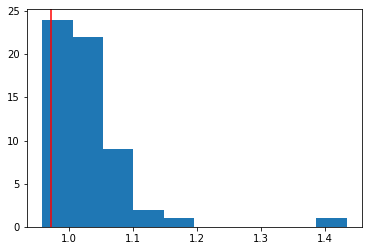

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0317056125738366


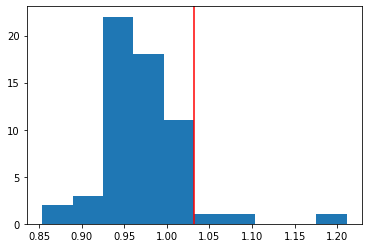

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.0317056125738366, 0.9721450402691196)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0128013800734783, 0.9845593740180999)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2459,63.470001,63.470001,64.209999,61.259998,66.464996,63.730000,1.047188,1.004096,0
2460,66.430000,66.430000,66.464996,63.730000,64.160004,62.000000,0.965829,0.933313,1
2461,63.049999,63.049999,64.160004,62.000000,62.919998,60.709999,0.997938,0.962887,0
2462,62.880001,62.880001,62.919998,60.709999,63.000000,60.180000,1.001908,0.957061,0
2463,60.770000,60.770000,63.000000,60.180000,59.080002,57.720001,0.972190,0.949811,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.0079001977429516,
 0.9799723566735211,
 1.0469762245992942,
 0.9721676442584803)

In [27]:
get_hilo_mults(aapl)

(1.0015147369613233,
 0.9861891249386702,
 1.0129917485409685,
 0.9844303215483178)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=[
        'stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
        'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.001515,0.986189,1.012992,0.984430
1,ABMD,1.001346,0.997113,1.020173,0.991148
2,ABNB,0.993133,0.977767,1.019650,0.987917
3,ABST,1.001468,0.996382,1.005494,0.993421
4,ACN,1.002591,0.988771,1.017235,0.993179


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,147.809998,AAPL
ABMD,377.200012,ABMD
ABNB,101.0,ABNB
ABST,9.97,ABST
ACN,300.130005,ACN
...,...,...
ZM,74.309998,ZM
ZYXI,13.8,ZYXI
^GSPC,4071.699951,^GSPC
^IXIC,11461.49707,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.001515,0.986189,1.012992,0.984430,147.809998
1,ABMD,1.001346,0.997113,1.020173,0.991148,377.200012
2,ABNB,0.993133,0.977767,1.019650,0.987917,101.0
3,ABST,1.001468,0.996382,1.005494,0.993421,9.97
4,ACN,1.002591,0.988771,1.017235,0.993179,300.130005


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv